In [1]:
from front_tracking_toolkit.experiment import Experiment
import concurrent.futures
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# load experiment definition and describe
exp = Experiment(r'C:\Users\Josh\git\front_tracking_toolkit\front_tracking_toolkit\example_experiment.yaml')
exp.describe()

Experiment Configuration:
Property                  Value
------------------------  ---------------------------------------------------------
basedir                   E:\Flow Pictures - complete data set\Flow Images\analysis
tracking_pattern          tracking/{subject}/{stain}/vf.csv
processed_images_pattern  processed/{subject}/{stain}/*.tif
tracking_image_stage      processed


Experiment Metadata:
  subject  stain      scale_factor  scale_units    genotype
---------  -------  --------------  -------------  ---------------------
       10  ova           0.0102462  mm             Twist CKO+
       31  ova           0.0102231  mm             Twist CKO+
       47  ova           0.0102927  mm             Twist CKO+
       84  ova           0.0102231  mm             Twist CKO+
      118  ova           0.0102462  mm             Twist CKO+
      126  ova           0.0102001  mm             Twist CKO+
      132  ova           0.0102231  mm             Twist CKO+
        9  ova           0.0

In [3]:
# take a peak at one sample
exp.samples[0].describe()

Sample('10', 'ova')
Attribute              Value
---------------------  ------------
Subject                10
Stain                  ova
Has Mask               False
Scale                  1.025E-02 mm
# raw images           61
# preprocessed images  61


Subject Metadata:
Attribute    Value
-----------  ----------
genotype     Twist CKO+


In [4]:
# run preprocessing for all samples
# To increase throughput, you can utilize a ProcessPool, as below

processes = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    for sample in exp.samples:
        processes.append(executor.submit(exp.preprocess_sample, sample))

    for result in tqdm(concurrent.futures.as_completed(processes), total=len(processes), desc="Preprocessing Samples"):
        result.result()

Preprocessing Samples: 100%|███████████████████████████████████████████████████████████| 16/16 [07:52<00:00, 29.50s/it]


In [4]:
exp._read_experiment_definition()

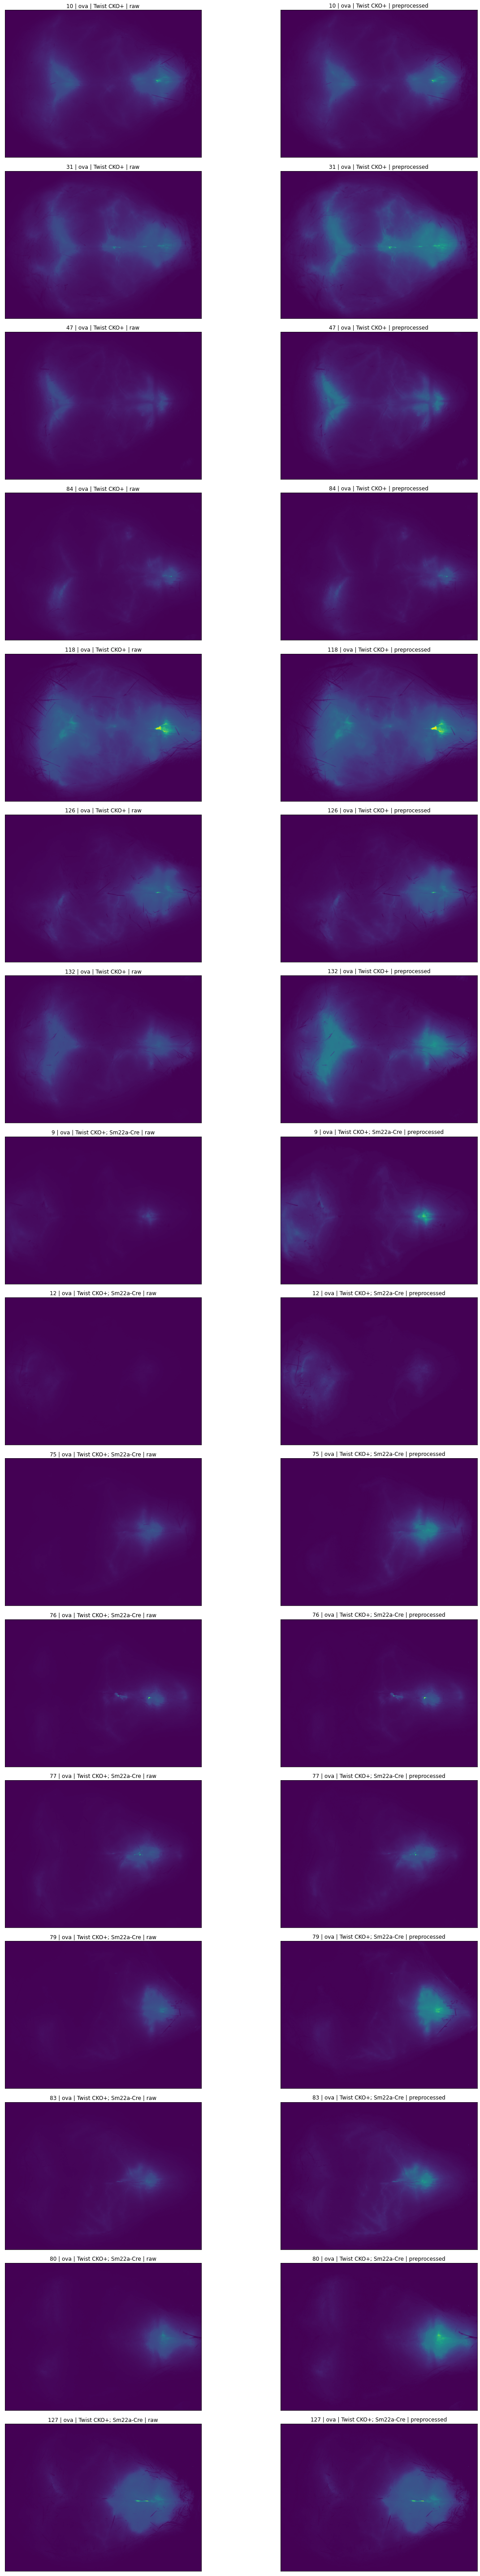

In [5]:
# plot the last frame from all samples
fig, axs = plt.subplots(len(exp.samples), 2, squeeze=False, figsize=(20, 80))
for sample_i, sample in enumerate(exp.samples):
    for stage_i, stage in enumerate(['raw', 'preprocessed']):
        ax = axs[sample_i, stage_i]
        ax.imshow(sample.load_images(stage=stage, t=-1), vmin=0, vmax=255)
        ax.set_title(f'{sample.subject} | {sample.stain} | {sample.metadata["genotype"]} | {stage}')
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
fig.tight_layout()

In [7]:
# Run Front Tracking on all samples
for sample in tqdm(exp.samples, desc="Tracking Samples"):
    if not exp.has_tracking_results(sample):
        try:
            exp.front_track_sample(sample)
        except Exception as e:
            tqdm.write(f'Error processing sample {sample}!')
            tqdm.write(str(e))
            #raise e
    else:
        tqdm.write(f'skipping sample {sample}')

Tracking Samples:   0%|                                                                         | 0/16 [00:00<?, ?it/s]

skipping sample Sample('10', 'ova')
skipping sample Sample('31', 'ova')
skipping sample Sample('47', 'ova')
skipping sample Sample('84', 'ova')
{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010246190744920992}


Tracking Samples:  31%|████████████████████▎                                            | 5/16 [02:24<05:18, 28.93s/it]

Error processing sample Sample('118', 'ova')!

  File C:\Users\Josh\git\front_tracking_toolkit\matlab\FrontTrackingWithFlowRelease\TheFrontTrackerArrays.m, line 500, in TheFrontTrackerArrays

  File C:\Users\Josh\git\front_tracking_toolkit\matlab\ProcessSample.m, line 30, in ProcessSample
The sample points must be finite.

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010200140449438202}



Tracking Samples:  38%|████████████████████████                                        | 6/16 [12:24<25:58, 155.87s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.01022311373873874}



Tracking Samples:  44%|███████████████████████████▏                                  | 7/16 [59:47<2:00:29, 803.27s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010177270179372196}



Tracking Samples:  50%|██████████████████████████████                              | 8/16 [1:03:52<1:28:01, 660.24s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.01}



Tracking Samples:  56%|█████████████████████████████████▊                          | 9/16 [1:08:42<1:05:28, 561.19s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010177270179372196}



Tracking Samples:  62%|██████████████████████████████████████▏                      | 10/16 [1:12:19<46:36, 466.03s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010177270179372196}



Tracking Samples:  69%|█████████████████████████████████████████▉                   | 11/16 [1:13:32<29:32, 354.43s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010177270179372196}



Tracking Samples:  75%|█████████████████████████████████████████████▊               | 12/16 [1:15:00<18:31, 277.77s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010177270179372196}



Tracking Samples:  81%|█████████████████████████████████████████████████▌           | 13/16 [1:18:14<12:40, 253.47s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.01022311373873874}



Tracking Samples:  88%|█████████████████████████████████████████████████████▍       | 14/16 [1:24:14<09:29, 284.60s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010177270179372196}



Tracking Samples:  94%|█████████████████████████████████████████████████████████▏   | 15/16 [1:27:37<04:20, 260.51s/it]

{'threshold': 15, 'maxSpeed': 1, 'scale': 0.010200140449438202}



Tracking Samples: 100%|█████████████████████████████████████████████████████████████| 16/16 [1:34:57<00:00, 356.11s/it]
